In [1]:
from adaptive_library import *
import numpy as np
import os
import matplotlib.pyplot as plt


 Original Noisy Image:0018.png

SNR = 17.9861635346691

 Adaptive Part 

SNR = 22.37509730361289
SNR = 24.94035015233092
SNR = 25.088546384997514
SNR = 24.640849955422006

 Gaussian Part 

SNR = 22.97200828857931


/home/shoachia/anaconda3/lib/python3.7/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


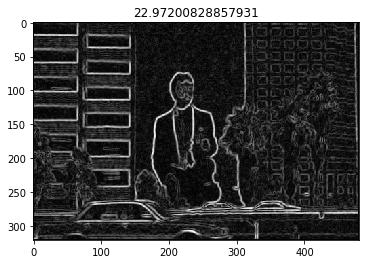

In [2]:
directory_original = './CBSD68-dataset-master/CBSD68/original_png/'
for filename in os.listdir(directory_original):
    img = plt.imread('./CBSD68-dataset-master/CBSD68/original_png/' + filename)
    y = plt.imread('./CBSD68-dataset-master/CBSD68/noisy35/' + filename)
    #img = plt.imread('test2.png')
    #y = img + 20/255 * np.random.randn(*img.shape)
    gauss_img = img.copy()
    gauss_y = y.copy()
    err = psnr(img,y)
    print("\n Original Noisy Image:" + filename +"\n")
    print("SNR = " + str(err))
    
    cur = rgb2edge(y,False)
    plt.title("noise35 SNR = " + str(err))
    plt.imshow(cur,cmap = 'gray')
    plt.savefig('./Results/noisy_edge/'+filename)
    
    print("\n Adaptive Part \n")
    # adaptive filter
    new_img,err,rec,rec2 = adaptive_denoise(img,y)
    plt.title(str(err))
    plt.imshow(normalize(new_img))
    plt.savefig('./Results/adaptive_image/'+filename)
    
    
    cur = rgb2edge(new_img,False)
    plt.title(str(err))
    plt.savefig('./Results/adaptive_edge/'+filename)
    
    print("\n Gaussian Part \n")
    ## Gaussian Blur
    blur_img = filters.gaussian(gauss_y)
    err = psnr(img,blur_img)
    print("SNR = " + str(err))
    plt.title(str(err))
    plt.imshow(blur_img)
    plt.savefig('./Results/gaussian_image/'+filename)
    
    cur = rgb2edge(blur_img,False)
    plt.title(str(err))
    plt.savefig('./Results/gaussian_edge/'+filename)
    break

Text(0.5,1,'clean image')

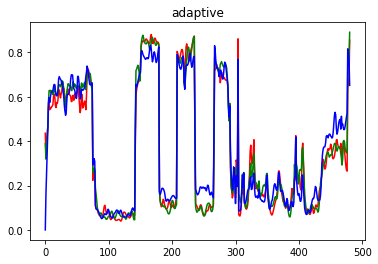

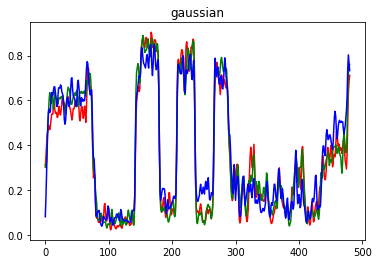

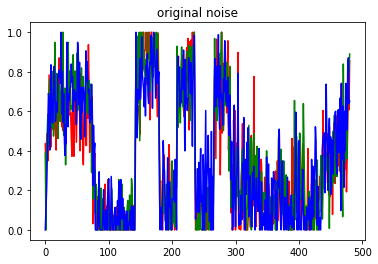

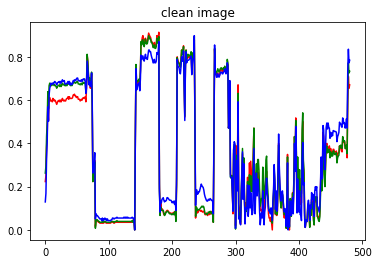

In [3]:
## Plot the performance
plt.figure()
plt.plot(new_img[150,:,0],'r')
plt.plot(new_img[150,:,1],'g')
plt.plot(new_img[150,:,2],'b')
plt.title('adaptive')
plt.figure()
plt.plot(blur_img[150,:,0],'r')
plt.plot(blur_img[150,:,1],'g')
plt.plot(blur_img[150,:,2],'b')
plt.title('gaussian')

ytest = plt.imread('./CBSD68-dataset-master/CBSD68/noisy35/'+ filename)
#img = plt.imread('test2.png')
#ytest = img + 20/255 * np.random.randn(*img.shape)
plt.figure()
plt.plot(ytest[150,:,0],'r')
plt.plot(ytest[150,:,1],'g')
plt.plot(ytest[150,:,2],'b')
plt.title('original noise')
plt.figure()
plt.plot(img[150,:,0],'r')
plt.plot(img[150,:,1],'g')
plt.plot(img[150,:,2],'b')
plt.title('clean image')



Text(0.5,1,'Curve of SNR')

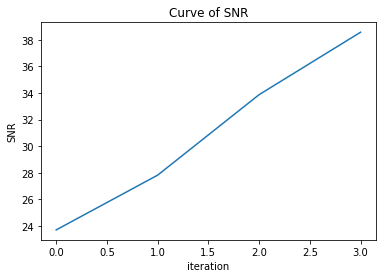

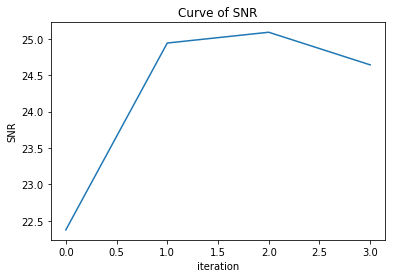

In [4]:
plt.figure()
plt.plot(rec)
plt.xlabel('iteration')
plt.ylabel('SNR')
plt.title('Curve of SNR')
plt.figure()
plt.plot(rec2)
plt.xlabel('iteration')
plt.ylabel('SNR')
plt.title('Curve of SNR')

In [5]:
rec

[23.69644606173462, 27.81789626349515, 33.87518299171803, 38.575684289401615]